In [24]:
import tushare as ts
from datetime import date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pdb

# start = "2023 1 1"
# end   = "2024 1 26"
# # 赛轮轮胎 vs 上证指数
ticker1  = '601058'
ticker2  = "000001"

#Get stock data
stock1 = ts.get_hist_data(ticker1)
stock2 = ts.get_hist_data(ticker2)

# 调整为按时间升序
stock1 = stock1.sort_values(by="date",ascending=True)
stock2 = stock2.sort_values(by="date",ascending=True)

stock1_daily_returns = stock1['close'].pct_change()
stock2_daily_returns = stock2['close'].pct_change()

print(stock2_daily_returns)


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
date
2021-08-02         NaN
2021-08-03   -0.006663
2021-08-04   -0.004472
2021-08-05   -0.007299
2021-08-06    0.010181
                ...   
2024-01-23    0.006593
2024-01-24    0.018559
2024-01-25    0.018221
2024-01-26    0.012632
2024-01-29    0.008316
Name: close, Length: 607, dtype: float64


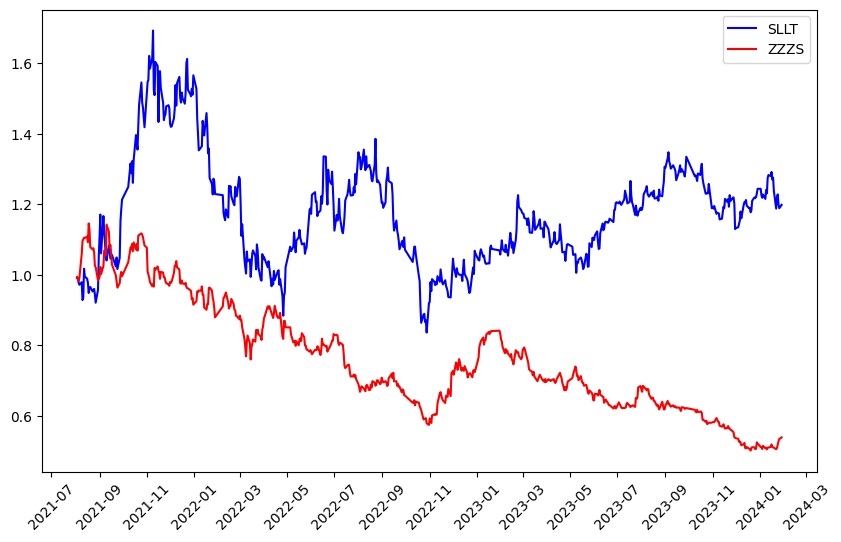

In [26]:
plt.figure(figsize=(10, 6)) # plt.figure(figsize=(width, height))

from matplotlib.dates import MonthLocator, DateFormatter, date2num
# 设置 x 轴刻度显示频率为每个月一次
# bymonth是一年一次 在x月标记
locator = MonthLocator(interval=2)
plt.xticks(rotation=45)  # 你可以设置需要的角度
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# 不用date2num就会导致plot内部无法识别 变成1970年开始
# 回报率+1 是为了累加 这里计算的就是从起始日期开始的每月的叠加回报率 (1 + 0.05) * (1 - 0.04) ... 
# cumulative product 是累乘 
plt.plot(date2num(stock1.index), (stock1_daily_returns + 1).cumprod(), label='SLLT', color='blue')
plt.plot(date2num(stock2.index), (stock2_daily_returns + 1).cumprod(), label='ZZZS', color='red')

plt.xticks(rotation=45)
plt.legend()
plt.show()
